## Chapater 2 Code - Python 3 version

### simpleBagging.py

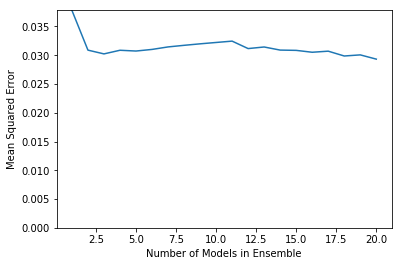

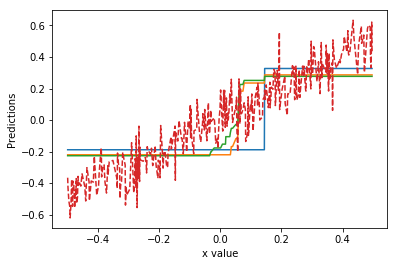

Minimum MSE
0.0293239640579636


In [1]:
__author__ = 'mike-bowles'

import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random


#Build a simple data set with y = x + random
nPoints = 1000

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 20

#tree depth - typically at the high end
treeDepth = 1

#initialize a list to hold models
modelList = []
predList = []

#number of samples to draw for stochastic bagging
nBagSamples = int(len(xTrain) * 0.5)

for iTrees in range(numTreesMax):
    idxBag = []
    for i in range(nBagSamples):
        idxBag.append(random.choice(range(len(xTrain))))
    xTrainBag = [xTrain[i] for i in idxBag]
    yTrainBag = [yTrain[i] for i in idxBag]

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag, yTrainBag)

    #make prediction with latest model and add to list of predictions
    latestPrediction = modelList[-1].predict(xTest)
    predList.append(list(latestPrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #average first "iModels" of the predictions
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)])/(iModels + 1))

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

plotList = [0, 9, 19]
for iPlot in plotList:
    plot.plot(xTest, allPredictions[iPlot])
plot.plot(xTest, yTest, linestyle="--")
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()

print('Minimum MSE')
print(min(mse))


#With treeDepth = 1
#Minimum MSE
#0.0242960117899



#With treeDepth = 5
#Minimum MSE
#0.0118893503384

### simpleGBM.py

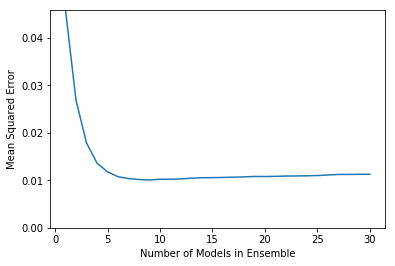

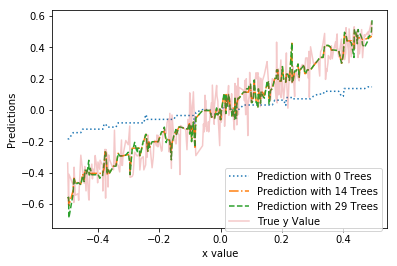

In [2]:
__author__ = 'mike-bowles'

import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random

#Build a simple data set with y = x + random
nPoints = 1000

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 30

#tree depth - typically at the high end
treeDepth = 5

#initialize a list to hold models
modelList = []
predList = []
eps = 0.3

#initialize residuals to be the labels y
residuals = list(yTrain)

for iTrees in range(numTreesMax):

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals)

    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)

    #use new predictions to update residuals
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]

    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #add the first "iModels" of the predictions and multiply by eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

plotList = [0, 14, 29]
lineType = [':', '-.', '--']
plot.figure()
for i in range(len(plotList)):
    iPlot = plotList[i]
    textLegend = 'Prediction with ' + str(iPlot) + ' Trees'
    plot.plot(xTest, allPredictions[iPlot], label = textLegend, linestyle = lineType[i])
plot.plot(xTest, yTest, label='True y Value', alpha=0.25)
plot.legend(bbox_to_anchor=(1,0.3))
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()


### simpleTree.py

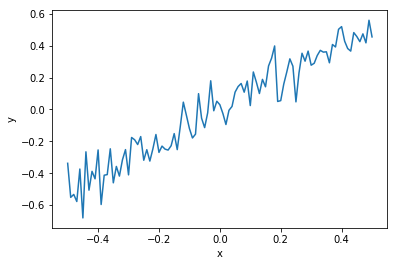

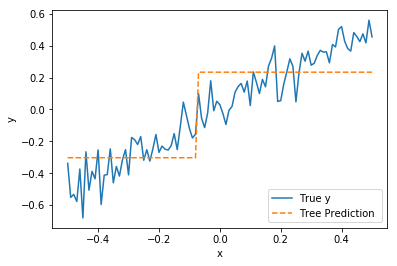

In [3]:
__author__ = 'mike-bowles'

import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO

#Build a simple data set with y = x + random
nPoints = 100

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

plot.plot(xPlot,y)
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x, y)

#draw the tree
with open("simpleTree.dot", 'w') as f:
    f = tree.export_graphviz(simpleTree, out_file=f)

#compare prediction from tree with true values

yHat  = simpleTree.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

simpleTree2 = DecisionTreeRegressor(max_depth=2)
simpleTree2.fit(x, y)

#draw the tree
with open("simpleTree2.dot", 'w') as f:
    f = tree.export_graphviz(simpleTree2, out_file=f)


### simpleTreeCV.py

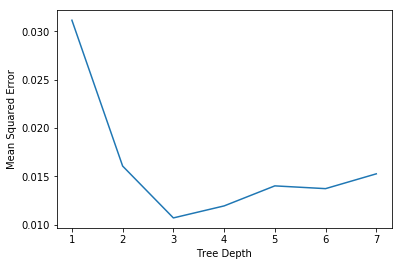

In [4]:
__author__ = 'mike-bowles'

import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO

#Build a simple data set with y = x + random
nPoints = 100

#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]

#x needs to be list of lists.
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

nrow = len(x)

#fit trees with several different values for depth and use x-validation to see which works best.

depthList = [1, 2, 3, 4, 5, 6, 7]
xvalMSE = []
nxval = 10

for iDepth in depthList:

    #build cross-validation loop to fit tree and evaluate on out of sample data
    for ixval in range(nxval):

        #Define test and training index sets
        idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
        idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]

        #Define test and training attribute and label sets
        xTrain = [x[r] for r in idxTrain]
        xTest = [x[r] for r in idxTest]
        yTrain = [y[r] for r in idxTrain]
        yTest = [y[r] for r in idxTest]

        #train tree of appropriate depth and accumulate out of sample (oos) errors
        treeModel = DecisionTreeRegressor(max_depth=iDepth)
        treeModel.fit(xTrain, yTrain)

        treePrediction = treeModel.predict(xTest)
        error = [yTest[r] - treePrediction[r] for r in range(len(yTest))]

        #accumulate squared errors
        if ixval == 0:
            oosErrors = sum([e * e for e in error])
        else:
            #accumulate predictions
            oosErrors += sum([e * e for e in error])

    #average the squared errors and accumulate by tree depth

    mse = oosErrors/nrow
    xvalMSE.append(mse)

plot.plot(depthList, xvalMSE)
plot.axis('tight')
plot.xlabel('Tree Depth')
plot.ylabel('Mean Squared Error')
plot.show()

### wineBagging.py

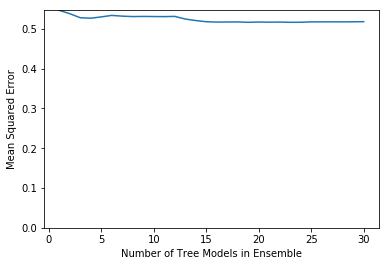

Minimum MSE
0.5164762448403564


In [5]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import random
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

#take fixed test set 30% of sample
random.seed(1)
nSample = int(nrows * 0.30)
idxTest = random.sample(range(nrows), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [xList[r] for r in idxTrain]
xTest = [xList[r] for r in idxTest]
yTrain = [labels[r] for r in idxTrain]
yTest = [labels[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 30

#tree depth - typically at the high end
treeDepth = 1

#initialize a list to hold models
modelList = []
predList = []

#number of samples to draw for stochastic bagging
nBagSamples = int(len(xTrain) * 0.5)

for iTrees in range(numTreesMax):
    idxBag = []
    for i in range(nBagSamples):
        idxBag.append(random.choice(range(len(xTrain))))
    xTrainBag = [xTrain[i] for i in idxBag]
    yTrainBag = [yTrain[i] for i in idxBag]

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag, yTrainBag)

    #make prediction with latest model and add to list of predictions
    latestPrediction = modelList[-1].predict(xTest)
    predList.append(list(latestPrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #average first "iModels" of the predictions
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)])/(iModels + 1))

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Tree Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

print('Minimum MSE')
print(min(mse))

#with treeDepth = 1
#Minimum MSE
#0.516236026081


#with treeDepth = 5
#Minimum MSE
#0.39815421341

#with treeDepth = 12 & numTreesMax = 100
#Minimum MSE
#0.350749027669

### wineGBM.py

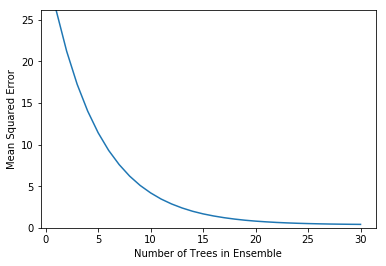

Minimum MSE
0.41094195113923954


In [6]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import random
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

#take fixed test set 30% of sample
nSample = int(nrows * 0.30)
idxTest = random.sample(range(nrows), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [xList[r] for r in idxTrain]
xTest = [xList[r] for r in idxTest]
yTrain = [labels[r] for r in idxTrain]
yTest = [labels[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 30

#tree depth - typically at the high end
treeDepth = 5

#initialize a list to hold models
modelList = []
predList = []
eps = 0.1

#initialize residuals to be the labels y
residuals = list(yTrain)

for iTrees in range(numTreesMax):

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals)

    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)

    #use new predictions to update residuals
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]

    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #add the first "iModels" of the predictions and multiply by eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

print('Minimum MSE')
print(min(mse))

#printed output
#Minimum MSE
#0.405031864814

### wineRF.py

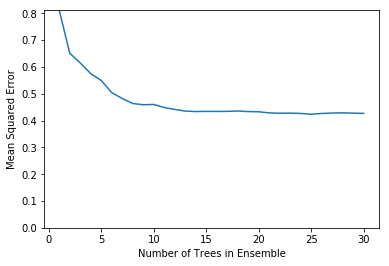

Minimum MSE
0.4236699323843097


In [7]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import random
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

#take fixed test set 30% of sample
random.seed(1)  #set seed so results are the same each run
nSample = int(nrows * 0.30)
idxTest = random.sample(range(nrows), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nrows) if not(idx in idxTest)]

#Define test and training attribute and label sets
xTrain = [xList[r] for r in idxTrain]
xTest = [xList[r] for r in idxTest]
yTrain = [labels[r] for r in idxTrain]
yTest = [labels[r] for r in idxTest]

#train a series of models on random subsets of the training data
#collect the models in a list and check error of composite as list grows

#maximum number of models to generate
numTreesMax = 30

#tree depth - typically at the high end
treeDepth = 12

#pick how many attributes will be used in each model.
# authors recommend 1/3 for regression problem
nAttr = 4

#initialize a list to hold models
modelList = []
indexList = []
predList = []
nTrainRows = len(yTrain)

for iTrees in range(numTreesMax):

    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))

    #take random sample of attributes
    idxAttr = random.sample(range(ncols), nAttr)
    idxAttr.sort()
    indexList.append(idxAttr)

    #take a random sample of training rows
    idxRows = []
    for i in range(int(0.5 * nTrainRows)):
        idxRows.append(random.choice(range(len(xTrain))))
    idxRows.sort()

    #build training set
    xRfTrain = []
    yRfTrain = []

    for i in range(len(idxRows)):
        temp = [xTrain[idxRows[i]][j] for j in idxAttr]
        xRfTrain.append(temp)
        yRfTrain.append(yTrain[idxRows[i]])

    modelList[-1].fit(xRfTrain, yRfTrain)

    #restrict xTest to attributes selected for training
    xRfTest = []
    for xx in xTest:
        temp = [xx[i] for i in idxAttr]
        xRfTest.append(temp)

    latestOutSamplePrediction = modelList[-1].predict(xRfTest)
    predList.append(list(latestOutSamplePrediction))


#build cumulative prediction from first "n" models
mse = []
allPredictions = []
for iModels in range(len(modelList)):

    #add the first "iModels" of the predictions and multiply by eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) / (iModels + 1))

    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors]) / len(yTest))


nModels = [i + 1 for i in range(len(modelList))]

plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()

print('Minimum MSE')
print(min(mse))

#printed output

#Depth 1
#Minimum MSE
#0.52666715461

#Depth 5
#Minimum MSE
#0.426116327584

#Depth 12
#Minimum MSE
#0.38508387863

### wineTree.py

In [9]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

nrows = len(xList)
ncols = len(xList[0])

wineTree = DecisionTreeRegressor(max_depth=3)

wineTree.fit(xList, labels)

with open("wineTree.dot", 'w') as f:
    f = tree.export_graphviz(wineTree, out_file=f)
#Note: The code above exports the trained tree info to a Graphviz "dot" file.
#Drawing the graph requires installing GraphViz and the running the following on the command line
#dot -Tpng wineTree.dot -o wineTree.png
